# AlexNet
### Nama Kelompok: Shogun 
Anggota Kelompok: (beserta jobdesknya)
1. Yohani Seprini (210711478)
mengumpulkan dan menentukan dataset (untuk train validation test split), mengatasi error pada arsitekture model (AlexNet, GoogleNet, MobileNet, Vgg-16), mengerjakan data preparation (mengubah dataset menjadi iterator numpy, mengambil batch dari iterator,normalisasi data dan menampilkan hasil sebelum dan setelah normalisasi, menghitung jumlah batch dalam dataset, menampilkan visualisasi gambar setelah normalisasi), data augmentasi, implementasi data augmentasi menyimpan akurasi dan loss, mengerjakan model deployment, analisis hasil model dan menentukan model terbaik, dan melakukan deployment pada streamlit

2. Marcella Alicia Ndala (220711907)
mengerjakan arsitektur model AlexNet, mengerjakan preprocessing data, menampilkan visualisasi data gambar dari dataset, mengerjakan grafik akurasi dan loss AlexNet

3. Mardika Gidion Omega Limbongan (220712025)
mengerjakan arsitektur model GoogleNet, menentukan parameter model alexnet, training model dan memantau proses training, impelementasi early stopping dan callbacks, melakukan penyimpanan model setelah training

4. Aprilius Setio Budi Juja (220712045)
mengerjakan arsitektur model MobileNet, impelementasi prediksi untuk dataset uji pada semua model (AlexNet, GoogleNet, MobileNet, VGG-16),menghitung dan menampilkan confusion matrix, menghitung evaluasi metrik model (AlexNet, GoogleNet, MobileNet, VGG-16), visualisasi confusion matrix

5. Jawara Theo Christo (220712066)
mengerjakan arsitektur model VGG-16, pengujian model dataset uji untuk semua model (AlexNet, GoogleNet, MobileNet, VGG-16), membantu analisis hasil prediksi, analisis kesalahan prediksi, melakukan perbandingan antar model (AlexNet, GoogleNet, MobileNet, VGG-16)

### Data Loading

In [281]:
# import library
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image


In [282]:
# direktori dataset
count = 0
dirs = os.listdir(r'D:\Projek UAS PMDPM SHOGUN\Dataset\train')
for dir in dirs:
    files = list(os.listdir(r'D:\Projek UAS PMDPM SHOGUN\Dataset\train/' + dir))
    print(dir + ' Folder has ' + str(len(files)) + ' Images')
    count = count + len(files)
print('Images Folder has ' + str(count) + ' Images')

Garlic Folder has 250 Images
Onion Folder has 250 Images
Red_Onion Folder has 250 Images
Images Folder has 750 Images


In [283]:
# membaca data dari direktori
base_dir = r'D:\Projek UAS PMDPM SHOGUN\Dataset\train'

validation_split = 0.1

# membaca data dari direktori
dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed=123,
    image_size=(224, 224),
    batch_size=32,
)

# menampilkan class name
class_names = dataset.class_names
print("Class names:", class_names)

Found 750 files belonging to 3 classes.
Class names: ['Garlic', 'Onion', 'Red_Onion']


In [284]:
# train validation test split
total_count = len(list(dataset))
val_count = int(total_count * validation_split)
train_count = total_count - val_count
test_count = int(len(dataset) * 0.1) 

print("Total images:", total_count)
print("Train images:", train_count)
print("Validation images:", val_count)
print("Test images:", test_count) 

train_ds = dataset.take(train_count)
val_ds = dataset.skip(train_count).take(val_count)
test_ds = dataset.skip(train_count + val_count).take(test_count)

Total images: 24
Train images: 22
Validation images: 2
Test images: 2


### Data Visualization

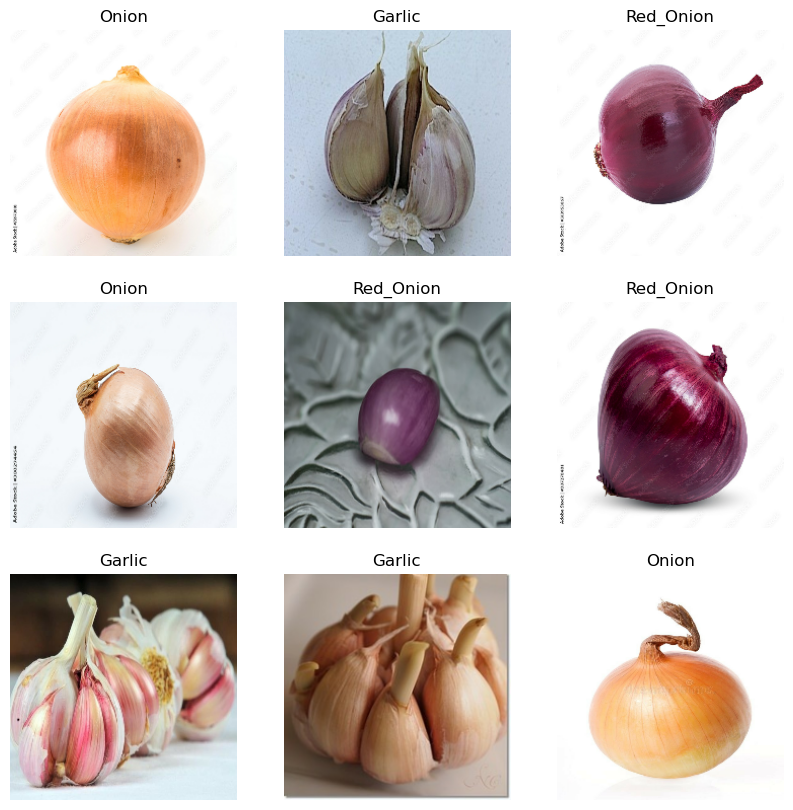

In [285]:
# menampilkan data gambar dengan paramter jumlah gambar yang ditampilkan
i = 0
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1) # ukuran gambar
        plt.imshow(images[i].numpy().astype("uint8")) # label gambar
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Data Preparation

In [286]:
# mengubah dataset menjadi iterator numpy
data_iterator = dataset.as_numpy_iterator()
print("data_iterator:", data_iterator)

# mengambil batch berikutnya dari iterator
batch = data_iterator.next()
print("batch:", batch)

data_iterator: NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000001BD651B1BD0>)
batch: (array([[[[ 66.96429  ,  39.964287 ,   9.964286 ],
         [ 65.89286  ,  38.892857 ,   8.892858 ],
         [ 64.82143  ,  37.82143  ,   7.821429 ],
         ...,
         [ 82.82143  ,  52.821426 ,  16.821426 ],
         [ 82.10715  ,  52.107147 ,  16.107147 ],
         [ 82.       ,  52.       ,  16.       ]],

        [[ 66.01786  ,  39.017857 ,   9.017858 ],
         [ 64.946434 ,  37.946426 ,   7.9464283],
         [ 63.705994 ,  36.705994 ,   6.7059956],
         ...,
         [ 82.04401  ,  52.044006 ,  16.044004 ],
         [ 82.00574  ,  52.00574  ,  16.00574  ],
         [ 82.       ,  52.       ,  16.       ]],

        [[ 68.69643  ,  39.875    ,   8.053572 ],
         [ 67.52742  ,  38.705994 ,   6.8845663],
         [ 65.626915 ,  36.805485 ,   4.984056 ],
         ...,
         [ 80.17857  ,  50.17857  ,  16.       ],
         [ 80.17857  ,

In [287]:
# normalisasi data dengan membagi nilai piksel dengan 255.0
data = dataset.map(lambda x, y: (x/255.0, y))

# tampil tipe data setelah normalisasi
print("Data type after normalization: {}".format(dataset.element_spec))
# tampil bentuk data setelah normalisasi
print("Data shape after normalization: {}".format(dataset.element_spec))
# hitung jumlah batch dalam dataset
print("Jumlah images:", len(dataset))

Data type after normalization: (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Data shape after normalization: (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Jumlah images: 24


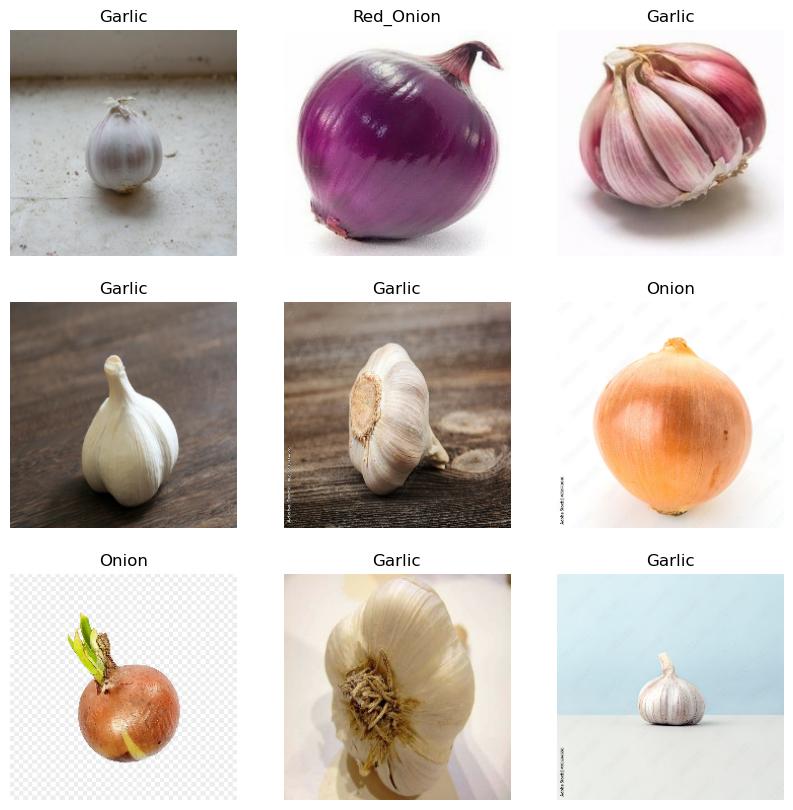

In [288]:
# visualisasi gambar setelah normalisasi
plt.figure(figsize=(10, 10))
for images, labels in data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [289]:
# train validation test split
total_count = len(list(dataset))
val_count = int(total_count * validation_split)
train_count = total_count - val_count
test_count = int(len(dataset) * 0.1) 

print("Total images:", total_count)
print("Train images:", train_count)
print("Validation images:", val_count)
print("Test images:", test_count) 

train_ds = dataset.take(train_count)
val_ds = dataset.skip(train_count).take(val_count)
test_ds = dataset.skip(train_count + val_count).take(test_count)

Total images: 24
Train images: 22
Validation images: 2
Test images: 2


### Model Architecture

In [290]:
for images, labels in train_ds.take(1):
    images_array = np.array(images)
    print(images_array.shape) 

(32, 224, 224, 3)


In [291]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

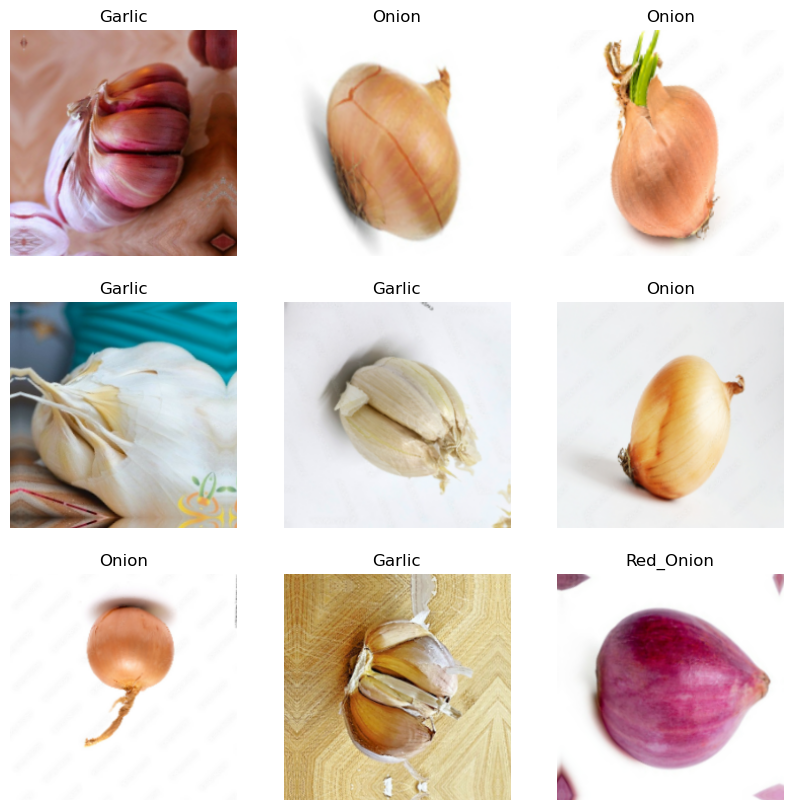

In [292]:
# data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [293]:
# AlexNet
modelAlex = Sequential()
modelAlex.add(data_augmentation)
modelAlex.add(Conv2D(96, kernel_size=(11, 11), strides=4, activation='relu', input_shape=(224, 224, 3)))
modelAlex.add(MaxPooling2D(pool_size=(3, 3), strides=2))
modelAlex.add(Conv2D(256, kernel_size=(5, 5), strides=1, activation='relu'))
modelAlex.add(MaxPooling2D(pool_size=(3, 3), strides=2))
modelAlex.add(Conv2D(384, kernel_size=(3, 3), strides=1, activation='relu'))
modelAlex.add(Conv2D(384, kernel_size=(3, 3), strides=1, activation='relu'))
modelAlex.add(Conv2D(256, kernel_size=(3, 3), strides=1, activation='relu'))
modelAlex.add(MaxPooling2D(pool_size=(3, 3), strides=2))
modelAlex.add(Flatten())
modelAlex.add(Dense(4096, activation='relu'))
modelAlex.add(Dropout(0.5))
modelAlex.add(Dense(4096, activation='relu'))
modelAlex.add(Dropout(0.5))  
modelAlex.add(Dense(3, activation='softmax'))

c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [294]:
# compile model
modelAlex.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

modelAlex.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_28 (Sequential)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 22, 22, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 6, 6, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 4, 4, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 3)              │        12,291 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,593,475 (82.37 MB)

 Trainable params: 21,593,475 (82.37 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [295]:
# training menggunakan iteriasi
history = modelAlex.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]
)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 514ms/step - accuracy: 0.3169 - loss: 37.6360 - val_accuracy: 0.3043 - val_loss: 1.1012
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 489ms/step - accuracy: 0.3272 - loss: 1.1013 - val_accuracy: 0.3696 - val_loss: 1.0955
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 506ms/step - accuracy: 0.3354 - loss: 1.0986 - val_accuracy: 0.3261 - val_loss: 1.0875
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 483ms/step - accuracy: 0.3056 - loss: 1.1052 - val_accuracy: 0.3696 - val_loss: 1.0935
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 493ms/step - accuracy: 0.3417 - loss: 1.0990 - val_accuracy: 0.3696 - val_loss: 1.0953


In [296]:
# menyimpan akurasi dan loss
history_df = pd.DataFrame(history.history)
print(history_df)

   accuracy       loss  val_accuracy  val_loss
0  0.308239  15.225333      0.304348  1.101232
1  0.333807   1.100877      0.369565  1.095541
2  0.336648   1.098526      0.326087  1.087468
3  0.305398   1.105525      0.369565  1.093514
4  0.328125   1.100389      0.369565  1.095305


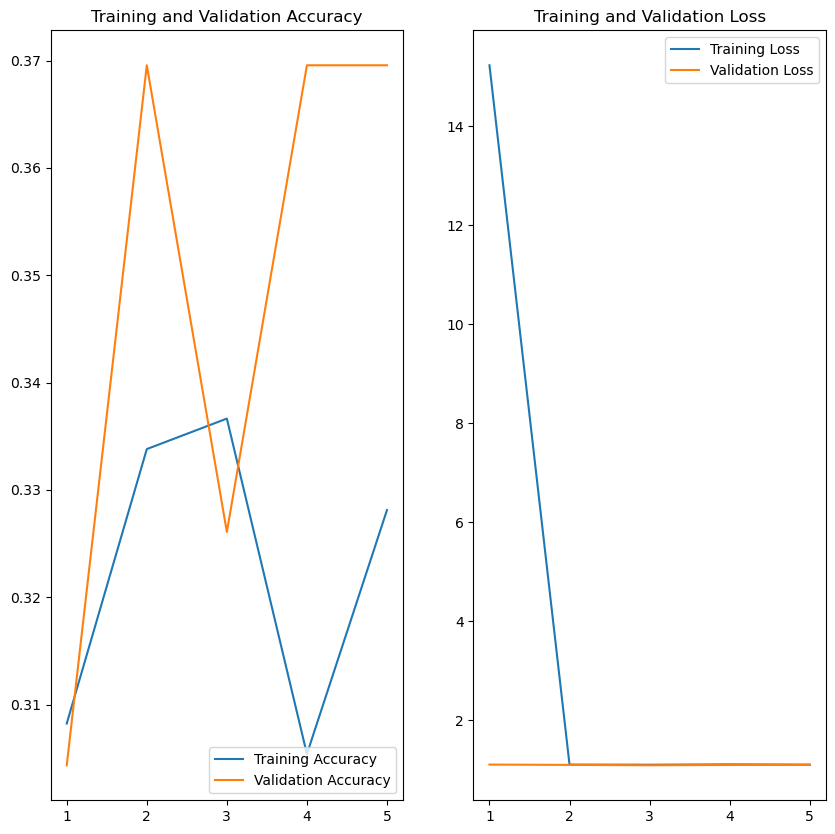

In [297]:
# visualisasi akurasi dan loss
ephocs_range = range(1, len(history.history['accuracy']) + 1)
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.plot(ephocs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(ephocs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(ephocs_range, history.history['loss'], label='Training Loss')
plt.plot(ephocs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [298]:
# menyimpan model
modelAlex.save('BestModel_AlexNet_Shogun.h5')

### Model Evaluation

In [299]:
# prediksi untuk set data uji
model = load_model('D:\Projek UAS PMDPM SHOGUN\BestModel_AlexNet_Shogun.h5')
class_names = ['Bawang_Bombay', 'Bawang_Merah', 'Bawang_Putih']

# klasifikasi dataset
def classify_images(image_path, save_path='predicted_image.jpg'):
    try:
        input_image = tf.keras.utils.load_img(image_path, target_size=(224, 224))
        input_image_array = tf.keras.utils.img_to_array(input_image) / 255.0
        input_image_exp_dim = tf.expand_dims(input_image_array, axis=0)

        predictions = model.predict(input_image_exp_dim)
        result = tf.nn.softmax(predictions[0])
        class_idx = np.argmax(result)
        confidence = np.max(result) * 100

        print('Prediction: {}'.format(class_names[class_idx]))
        print('Confidence: {:.2f}%'.format(confidence))

        input_image = Image.open(image_path)
        input_image.save(save_path)

        return f'Prediksi: {class_names[class_idx]} dengan confidence : {confidence:.2f}%. Gambar asli disimpan di {save_path}.'
    except Exception as e:
        return f'Terjadi kesalahan: {e}'
    
result = classify_images(r'D:\Projek UAS PMDPM SHOGUN\Dataset\test\Red_Onion\Red_Onion_225.jpg', save_path='Red_Onion_AlexNet.jpg')
print(result)
# %

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Prediction: Bawang_Bombay
Confidence: 33.51%
Prediksi: Bawang_Bombay dengan confidence : 33.51%. Gambar asli disimpan di Red_Onion_AlexNet.jpg.


Found 76 files belonging to 3 classes.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step


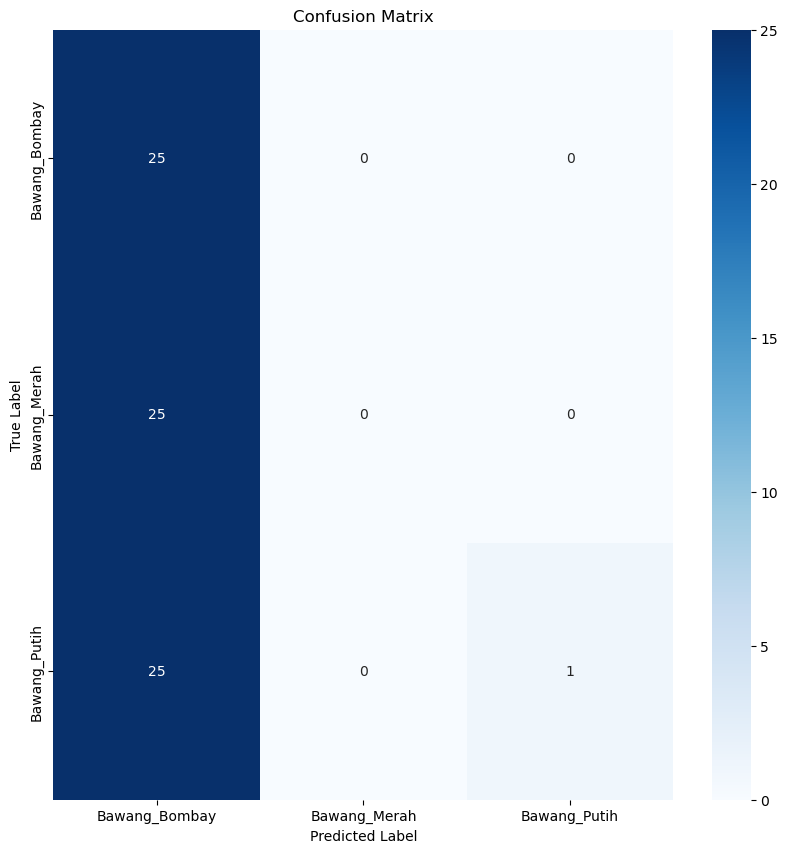

Confusion Matrix:
 [[25  0  0]
 [25  0  0]
 [25  0  1]]
Accuracy: 0.34210526315789475
Precision: [0.33333333 0.         1.        ]
Recall: [1.         0.         0.03846154]
F1 Score: [0.5               nan 0.07407407]


In [300]:
# memuat dataset uji
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'D:\Projek UAS PMDPM SHOGUN\dataset\test',
    labels='inferred',
    label_mode='categorical',
    image_size=(224, 224),
    batch_size=32
)

# prediksi dataset uji
y_pred = model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1)

# mengambil label sebenarnya
true_labels = []
for images, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())
true_labels = tf.convert_to_tensor(true_labels)

# menghitung confusion matrix
conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)

# menghitung matrix evaluasi
accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)

precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
precision = tf.where(tf.math.is_nan(precision), tf.zeros_like(precision), precision)

recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)
recall = tf.where(tf.math.is_nan(recall), tf.zeros_like(recall), recall)

f1_score = 2 * precision * recall / (precision + recall)

# menampilkan confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(
    conf_mat, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=class_names, 
    yticklabels=class_names
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# menampilkan hasil evaluasi
print('Confusion Matrix:\n', conf_mat.numpy())
print('Accuracy:', accuracy.numpy())
print('Precision:', precision.numpy())
print('Recall:', recall.numpy())
print('F1 Score:', f1_score.numpy())